In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import joblib

In [10]:
import pandas as pd

df = pd.read_csv("Auto_Insurance_Fraud_Claims_File002.csv")
print(df.shape)
print(df.columns)
df.head()
df.isnull().sum().sort_values(ascending=False)

(20000, 53)
Index(['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured',
       'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date',
       'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit',
       'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies',
       'Insured_Relationship', 'Capital_Gains', 'Capital_Loss',
       'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type',
       'Accident_Severity', 'authorities_contacted', 'Acccident_State',
       'Acccident_City', 'Accident_Location', 'Accident_Hour',
       'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries',
       'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date',
       'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost',
       'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind',
       'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim',
       'Vehicle_Claim', 'Vehicle_Registr

,0
Police_Report,7092
authorities_contacted,2005
Customer_Life_Value1,0
Bind_Date1,0
Claim_ID,0
Policy_State,0
Policy_Start_Date,0
Policy_Expiry_Date,0
Policy_BI,0
Policy_Ded,0


In [11]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

Police_Report            7092
authorities_contacted    2005
dtype: int64


In [12]:
df['Police_Report'].fillna('Unknown', inplace=True)

/tmp/ipython-input-12-3407690288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Police_Report'].fillna('Unknown', inplace=True)


In [13]:
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)


/tmp/ipython-input-13-210851941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)


In [14]:
df.drop_duplicates(inplace=True)


In [15]:
df['Police_Report'] = df['Police_Report'].str.strip().str.lower()

In [16]:
df['authorities_contacted'] = df['authorities_contacted'].str.strip().str.lower()

In [17]:
df['Claims_Date'] = pd.to_datetime(df['Claims_Date'], errors='coerce')

/tmp/ipython-input-18-3910751259.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Fraud_Ind', palette='Set2')


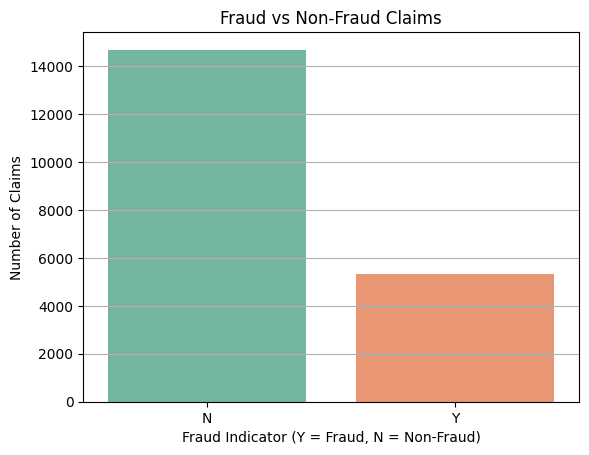

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Fraud_Ind', palette='Set2')
plt.title("Fraud vs Non-Fraud Claims")
plt.xlabel("Fraud Indicator (Y = Fraud, N = Non-Fraud)")
plt.ylabel("Number of Claims")
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-19-725191926.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Fraud_Ind', palette='Set2')


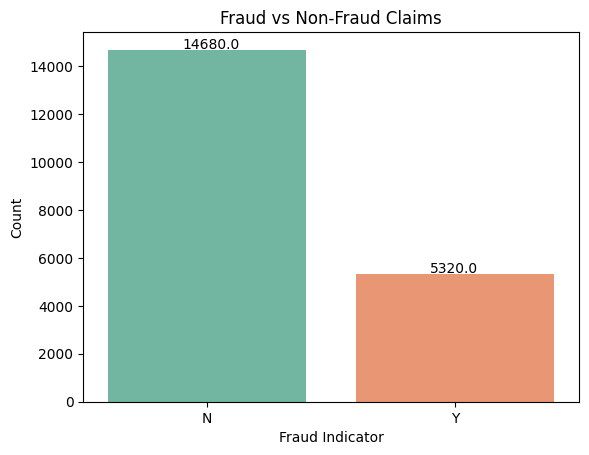

In [19]:
ax = sns.countplot(data=df, x='Fraud_Ind', palette='Set2')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 50))

plt.title("Fraud vs Non-Fraud Claims")
plt.xlabel("Fraud Indicator")
plt.ylabel("Count")
plt.show()


In [20]:
from scipy import stats
import numpy as np

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

z_scores = np.abs(stats.zscore(df[numerical_cols]))

df_cleaned = df[(z_scores < 3).all(axis=1)].copy()

print("Before removing outliers:", df.shape)

Before removing outliers: (20000, 53)


In [21]:
print("After removing outliers :", df_cleaned.shape)

After removing outliers : (18588, 53)


In [22]:
df_cleaned['Total_Claim_Check'] = df_cleaned['Injury_Claim'] + df_cleaned['Property_Claim'] + df_cleaned['Vehicle_Claim']

In [23]:
df_cleaned['Claim_Ratio'] = df_cleaned['Total_Claim'] / df_cleaned['Vehicle_Cost']

In [24]:
df_cleaned['Mileage_Deviation'] = df_cleaned['DiffIN_Mileage'] / df_cleaned['Annual_Mileage']

In [25]:
df_cleaned['Policy_Expiry_Date'] = pd.to_datetime(df_cleaned['Policy_Expiry_Date'], errors='coerce')
df_cleaned['Policy_Start_Date'] = pd.to_datetime(df_cleaned['Policy_Start_Date'], errors='coerce')

In [26]:
df_cleaned['Policy_Duration'] = (df_cleaned['Policy_Expiry_Date'] - df_cleaned['Policy_Start_Date']).dt.days

In [27]:
date_cols = ['Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date', 'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']

for col in date_cols:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point', 'Fraud_Ind']
X = df_cleaned.drop(columns=drop_cols)
y = df_cleaned['Fraud_Ind']

le = LabelEncoder()
y = le.fit_transform(y)

datetime_cols = ['Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
                 'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']
X = X.drop(columns=datetime_cols)

categorical_cols = X.select_dtypes(include='object').columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, stratify=y, test_size=0.2, random_state=42
)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point', 'Fraud_Ind',
             'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']

X = df_cleaned.drop(columns=drop_cols)
y = df_cleaned['Fraud_Ind']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(name, y_test, y_pred, model=None, proba=None):
    print(f"\n🔹 {name} 🔹")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if proba is not None:
        print("ROC-AUC Score:", roc_auc_score(y_test, proba))


In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]

evaluate_model("Logistic Regression", y_test, y_pred_lr, lr_model, y_proba_lr)



🔹 Logistic Regression 🔹
Confusion Matrix:
[[2719    0]
 [ 999    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      2719
           1       0.00      0.00      0.00       999

    accuracy                           0.73      3718
   macro avg       0.37      0.50      0.42      3718
weighted avg       0.53      0.73      0.62      3718

ROC-AUC Score: 0.5657511133789177


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

evaluate_model("Decision Tree", y_test, y_pred_dt, dt_model, y_proba_dt)



🔹 Decision Tree 🔹
Confusion Matrix:
[[2719    0]
 [   0  999]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2719
           1       1.00      1.00      1.00       999

    accuracy                           1.00      3718
   macro avg       1.00      1.00      1.00      3718
weighted avg       1.00      1.00      1.00      3718

ROC-AUC Score: 1.0


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

evaluate_model("Random Forest", y_test, y_pred_rf, rf_model, y_proba_rf)



🔹 Random Forest 🔹
Confusion Matrix:
[[2719    0]
 [   0  999]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2719
           1       1.00      1.00      1.00       999

    accuracy                           1.00      3718
   macro avg       1.00      1.00      1.00      3718
weighted avg       1.00      1.00      1.00      3718

ROC-AUC Score: 1.0


In [36]:
import xgboost as xgb

def custom_logloss(preds, dtrain):
    labels = dtrain.get_label()
    grad = preds - labels
    hess = preds * (1.0 - preds)
    return grad, hess

dtrain = xgb.DMatrix(X_train, label=y_train)

params = {'max_depth': 3, 'eta': 0.1}
bst = xgb.Booster(params, [dtrain])

for i in range(100):
    bst.update(dtrain, i, fobj=custom_logloss)


In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(name, y_test, y_pred, model=None, proba=None):
    print(f"\n🔹 {name} 🔹")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    if proba is not None:
        print("ROC-AUC Score:", roc_auc_score(y_test, proba))

In [38]:
import joblib

joblib.dump(rf_model, 'best_fraud_model.pkl')

['best_fraud_model.pkl']

In [39]:
model = joblib.load('best_fraud_model.pkl')

In [40]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
import pandas as pd
import joblib

model = joblib.load("best_fraud_model.pkl")

df_test = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")

drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point',
             'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']
df_test = df_test.drop(columns=[col for col in drop_cols if col in df_test.columns])

df_test = df_test.fillna(0)

df_test_encoded = pd.get_dummies(df_test, drop_first=True)

expected_cols = model.feature_names_in_
df_test_encoded = df_test_encoded.reindex(columns=expected_cols, fill_value=0)

y_pred = model.predict(df_test_encoded)

y_pred_labels = ['Y' if pred == 1 else 'N' for pred in y_pred]

original_test = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")
submission = pd.DataFrame({
    'Claim_ID': original_test['Claim_ID'],
    'Fraud_Ind': y_pred_labels
})

submission.to_csv("Final_Fraud_Predictions.csv", index=False)
print("✅ Predictions saved to 'Final_Fraud_Predictions.csv'")


✅ Predictions saved to 'Final_Fraud_Predictions.csv'


In [42]:
# Load and display the prediction file
predictions = pd.read_csv("Final_Fraud_Predictions.csv")

# Show the top 10 predictions
print("🔍 Top 10 Predictions:")
print(predictions.head(10))

# Show basic info
print("\n📊 Prediction Summary:")
print(predictions['Fraud_Ind'].value_counts())


🔍 Top 10 Predictions:
     Claim_ID Fraud_Ind
0  CC00000001         N
1  CC00000002         N
2  CC00000003         N
3  CC00000004         N
4  CC00000005         N
5  CC00000006         N
6  CC00000007         N
7  CC00000008         N
8  CC00000009         N
9  CC00000010         N

📊 Prediction Summary:
Fraud_Ind
N    10000
Name: count, dtype: int64


In [43]:
from google.colab import files
files.download('Final_Fraud_Predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# Load original test file
df_true = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")
print(df_true.columns)

Index(['Claim_ID', 'Fraud_Ind'], dtype='object')


In [47]:
df_pred = pd.read_csv("Final_Fraud_Predictions.csv")

df_true = pd.read_csv("Auto_Insurance_Fraud_Claims_Results_Submission.csv")

merged = df_pred.merge(df_true[['Claim_ID', 'Fraud_Ind']], on='Claim_ID', suffixes=('_pred', '_true'))

print(merged.head())
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("Auto_Insurance_Fraud_Claims_File002.csv")

drop_cols = ['Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point', 'Fraud_Ind',
             'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
             'Accident_Date', 'DL_Expiry_Date', 'Claims_Date']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

df = df.fillna(0)

df = pd.get_dummies(df, drop_first=True)

target = pd.read_csv("Auto_Insurance_Fraud_Claims_File002.csv")['Fraud_Ind']
le = LabelEncoder()
y = le.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(df, y, stratify=y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))


     Claim_ID Fraud_Ind_pred  Fraud_Ind_true
0  CC00000001              N             NaN
1  CC00000002              N             NaN
2  CC00000003              N             NaN
3  CC00000004              N             NaN
4  CC00000005              N             NaN
✅ Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      2936
       Fraud       1.00      1.00      1.00      1064

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [49]:
df1 = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
df3 = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")

print("File01 columns:", df1.columns)
print("File03 columns:", df3.columns)

File01 columns: Index(['Claim_ID', 'Bind_Date1', 'Customer_Life_Value1', 'Age_Insured',
       'Policy_Num', 'Policy_State', 'Policy_Start_Date', 'Policy_Expiry_Date',
       'Policy_BI', 'Policy_Ded', 'Policy_Premium', 'Umbrella_Limit',
       'Insured_Zip', 'Gender', 'Education', 'Occupation', 'Hobbies',
       'Insured_Relationship', 'Capital_Gains', 'Capital_Loss',
       'Garage_Location', 'Accident_Date', 'Accident_Type', 'Collision_Type',
       'Accident_Severity', 'authorities_contacted', 'Acccident_State',
       'Acccident_City', 'Accident_Location', 'Accident_Hour',
       'Num_of_Vehicles_Involved', 'Property_Damage', 'Bodily_Injuries',
       'Witnesses', 'Police_Report', 'DL_Expiry_Date', 'Claims_Date',
       'Auto_Make', 'Auto_Model', 'Auto_Year', 'Vehicle_Color', 'Vehicle_Cost',
       'Annual_Mileage', 'DiffIN_Mileage', 'Low_Mileage_Discount', 'Fraud_Ind',
       'Commute_Discount', 'Total_Claim', 'Injury_Claim', 'Property_Claim',
       'Vehicle_Claim', 'Vehicle_Reg

✅ Accuracy on File01: 0.8842

📊 Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.88      0.99      0.93     30120
       Fraud       0.93      0.57      0.71      9880

    accuracy                           0.88     40000
   macro avg       0.90      0.78      0.82     40000
weighted avg       0.89      0.88      0.87     40000



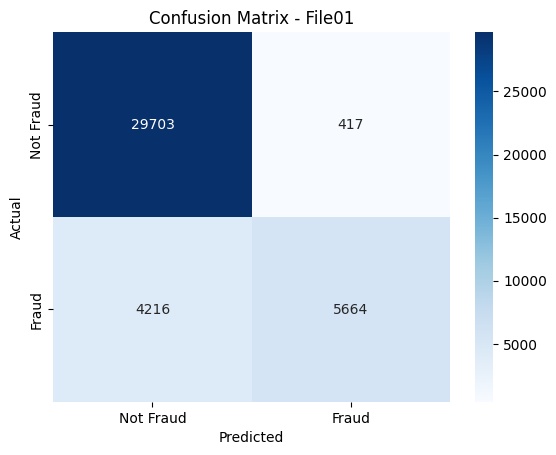

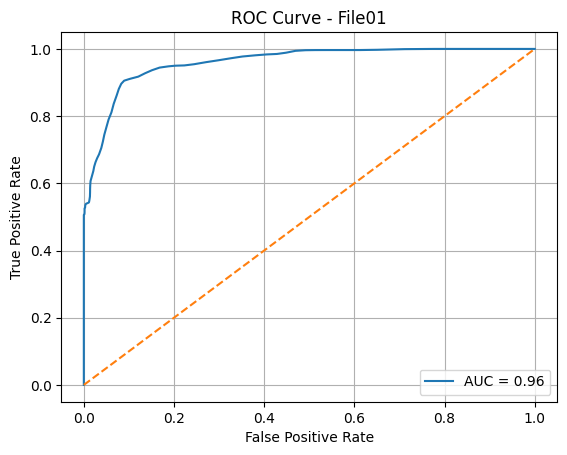

In [50]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder

# Load model
model = joblib.load("best_fraud_model.pkl")

# --- Step 1: Load File01 with labels ---
df1 = pd.read_csv("Auto_Insurance_Fraud_Claims_File01.csv")
y1 = df1['Fraud_Ind'].map({'Y': 1, 'N': 0})
X1 = df1.drop(columns=[
    'Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point',
    'Fraud_Ind', 'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
    'Accident_Date', 'DL_Expiry_Date', 'Claims_Date'
], errors='ignore')

X1 = X1.fillna(0)
X1 = pd.get_dummies(X1, drop_first=True)

# Align with model input
X1 = X1.reindex(columns=model.feature_names_in_, fill_value=0)

# Predict
y1_pred = model.predict(X1)
y1_prob = model.predict_proba(X1)[:, 1]

# Accuracy and Report
print(f"✅ Accuracy on File01: {accuracy_score(y1, y1_pred):.4f}")
print("\n📊 Classification Report:")
print(classification_report(y1, y1_pred, target_names=['Not Fraud', 'Fraud']))

# Confusion Matrix
cm = confusion_matrix(y1, y1_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix - File01")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y1, y1_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y1, y1_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - File01")
plt.legend()
plt.grid()
plt.show()


In [51]:
# Step 2: Predict on File03 (unlabeled)
df3 = pd.read_csv("Auto_Insurance_Fraud_Claims_File03.csv")
X3 = df3.drop(columns=[
    'Claim_ID', 'Policy_Num', 'Vehicle_Registration', 'Check_Point',
    'Bind_Date1', 'Policy_Start_Date', 'Policy_Expiry_Date',
    'Accident_Date', 'DL_Expiry_Date', 'Claims_Date'
], errors='ignore')

X3 = X3.fillna(0)
X3 = pd.get_dummies(X3, drop_first=True)
X3 = X3.reindex(columns=model.feature_names_in_, fill_value=0)

# Predict
y3_pred = model.predict(X3)
y3_label = pd.Series(y3_pred).map({1: 'Y', 0: 'N'})

# Save predictions
submission3 = pd.DataFrame({
    'Claim_ID': df3['Claim_ID'],
    'Fraud_Ind': y3_label
})
submission3.to_csv("File03_Predictions.csv", index=False)
print("✅ Predictions saved to File03_Predictions.csv")


✅ Predictions saved to File03_Predictions.csv


In [52]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Generate classification report
report = classification_report(y1, y1_pred, target_names=['Not Fraud', 'Fraud'])
accuracy = accuracy_score(y1, y1_pred)
auc = roc_auc_score(y1, y1_prob)

with open("File01_Evaluation_Report.txt", "w") as f:
    f.write(f"✅ Accuracy: {accuracy:.4f}\n")
    f.write(f"✅ ROC AUC Score: {auc:.4f}\n\n")
    f.write("📊 Classification Report:\n")
    f.write(report)


In [53]:
from google.colab import files
files.download("File01_Evaluation_Report.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

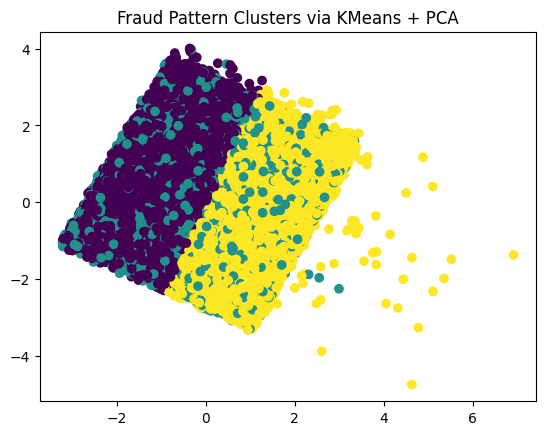

In [54]:
#Fraud Pattern Discovery using Clustering

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[numerical_cols])

# Apply KMeans
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

# Reduce dimensions for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Fraud Pattern Clusters via KMeans + PCA")
plt.show()

In [55]:
print(df.columns)

Index(['Customer_Life_Value1', 'Age_Insured', 'Policy_Ded', 'Policy_Premium',
       'Umbrella_Limit', 'Insured_Zip', 'Capital_Gains', 'Capital_Loss',
       'Accident_Hour', 'Num_of_Vehicles_Involved',
       ...
       'Auto_Model_Tahoe', 'Auto_Model_Ultima', 'Auto_Model_Wrangler',
       'Auto_Model_X5', 'Auto_Model_X6', 'Vehicle_Color_Blue',
       'Vehicle_Color_Gray', 'Vehicle_Color_Red', 'Vehicle_Color_Silver',
       'Vehicle_Color_White'],
      dtype='object', length=655)


In [56]:
# If you're using File01
df = pd.read_csv('Auto_Insurance_Fraud_Claims_File01.csv')


In [57]:
#Interactive Map of Fraud by Location
import plotly.express as px

# Make sure 'Fraud_Ind' exists
if 'Fraud_Ind' in df.columns:
    fraud_by_city = df[df['Fraud_Ind'] == 'Y'].groupby('Acccident_City').size().reset_index(name='Fraud_Count')
    fig = px.bar(fraud_by_city.sort_values('Fraud_Count', ascending=False).head(10),
                 x='Acccident_City', y='Fraud_Count',
                 title="Top Cities by Fraud Count")
    fig.show()
else:
    print("❌ 'Fraud_Ind' not found in dataset.")


In [60]:
df = pd.read_csv('Auto_Insurance_Fraud_Claims_File002.csv')

In [61]:
import plotly.express as px

# Make sure 'Fraud_Ind' exists
if 'Fraud_Ind' in df.columns:
    fraud_by_city = df[df['Fraud_Ind'] == 'Y'].groupby('Acccident_City').size().reset_index(name='Fraud_Count')
    fig = px.bar(fraud_by_city.sort_values('Fraud_Count', ascending=False).head(10),
                 x='Acccident_City', y='Fraud_Count',
                 title="Top Cities by Fraud Count")
    fig.show()
else:
    print("❌ 'Fraud_Ind' not found in dataset.")


In [ ]:
from google.colab import files
uploaded = files.upload()